# 导入所需要的包

In [44]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,confusion_matrix,f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
pd.options.display.max_columns =20
pd.options.display.max_rows = None
warnings.simplefilter('ignore')

# 处理数据

In [2]:
data = pd.read_csv('./data_processed.csv')
data

,pob,kids,married,fses,ynatstat,edarea,edachv,occ,school,relback,socbg,region,agejoin,cjoin,pljoin,risk
0,110.0,1.0,1.0,0.0,2.0,4.0,4.0,1.0,4.0,1.0,3.0,3.5,32.0,1.0,1.0,3.0
1,41.0,1.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,1.0,3.0,1.3,38.0,1.0,1.0,3.0
2,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,NaN,1.0,1.0,3.0
3,41.0,1.0,1.0,1.0,1.0,NaN,4.0,1.0,4.0,1.0,3.0,1.3,32.0,1.0,1.0,3.0
4,41.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,0.0,3.0,1.3,51.0,98.0,1.0,3.0
5,41.0,NaN,1.0,0.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,34.0,98.0,1.0,3.0
6,110.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,3.5,18.0,1.0,1.0,3.0
7,41.0,NaN,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,0.0,1.3,37.0,1.0,1.0,3.0
8,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,35.0,1.0,1.0,3.0
9,41.0,NaN,NaN,1.0,1.0,4.0,4.0,3.0,4.0,1.0,3.0,1.3,33.0,1.0,1.0,3.0


In [3]:
X = data.ix[:,:-1]
y = data['risk']

In [4]:
X

,pob,kids,married,fses,ynatstat,edarea,edachv,occ,school,relback,socbg,region,agejoin,cjoin,pljoin
0,110.0,1.0,1.0,0.0,2.0,4.0,4.0,1.0,4.0,1.0,3.0,3.5,32.0,1.0,1.0
1,41.0,1.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,1.0,3.0,1.3,38.0,1.0,1.0
2,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,NaN,1.0,1.0
3,41.0,1.0,1.0,1.0,1.0,NaN,4.0,1.0,4.0,1.0,3.0,1.3,32.0,1.0,1.0
4,41.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,0.0,3.0,1.3,51.0,98.0,1.0
5,41.0,NaN,1.0,0.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,34.0,98.0,1.0
6,110.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,3.5,18.0,1.0,1.0
7,41.0,NaN,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,0.0,1.3,37.0,1.0,1.0
8,41.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,1.0,3.0,1.3,35.0,1.0,1.0
9,41.0,NaN,NaN,1.0,1.0,4.0,4.0,3.0,4.0,1.0,3.0,1.3,33.0,1.0,1.0


In [5]:
y

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
5      3.0
6      3.0
7      3.0
8      3.0
9      3.0
10     3.0
11     3.0
12     3.0
13     3.0
14     3.0
15     3.0
16     3.0
17     3.0
18     3.0
19     3.0
20     3.0
21     3.0
22     3.0
23     3.0
24     3.0
25     3.0
26     3.0
27     3.0
28     3.0
29     3.0
30     3.0
31     3.0
32     3.0
33     3.0
34     2.0
35     3.0
36     3.0
37     2.0
38     2.0
39     2.0
40     2.0
41     2.0
42     2.0
43     2.0
44     2.0
45     2.0
46     2.0
47     2.0
48     2.0
49     2.0
50     2.0
51     2.0
52     2.0
53     2.0
54     2.0
55     2.0
56     2.0
57     2.0
58     2.0
59     2.0
60     3.0
61     2.0
62     2.0
63     2.0
64     2.0
65     2.0
66     2.0
67     2.0
68     2.0
69     2.0
70     2.0
71     2.0
72     2.0
73     2.0
74     2.0
75     2.0
76     2.0
77     2.0
78     2.0
79     2.0
80     2.0
81     2.0
82     2.0
83     2.0
84     2.0
85     2.0
86     2.0
87     2.0
88     2.0
89     2.0
90     2.0

In [6]:
feature_name = X.columns
feature_name

Index(['pob', 'kids', 'married', 'fses', 'ynatstat', 'edarea', 'edachv', 'occ',
       'school', 'relback', 'socbg', 'region', 'agejoin', 'cjoin', 'pljoin'],
      dtype='object')

In [7]:
imputer = Imputer(missing_values='NaN', strategy="most_frequent", axis=0)

In [8]:
X = imputer.fit_transform(X)

In [9]:
X = preprocessing.scale(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23323)

# model

svm

In [184]:
#构建网格参数
param_grid = {
    'kernel':('linear', 'rbf', 'sigmoid'), 'C':range(1,50),
}


In [185]:
SVM = SVC(class_weight='balanced',tol = 0.0001)
SVM

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False)

In [186]:
grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=3,
                           n_jobs=-1, verbose=1,scoring = 'f1_weighted')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:   17.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ('linear', 'rbf', 'sigmoid'), 'C': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=1)

In [187]:
print(grid_search.best_params_) 
#使用网格搜索得到的最好的参数选择进行模型训练
best_SVM = grid_search.best_estimator_
best_SVM.fit(X_train, y_train)


{'kernel': 'rbf', 'C': 28}


SVC(C=28, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False)

In [188]:
y_pred = best_SVM.predict(X_test)
y_pred.shape

(48,)

In [189]:
y_test.shape

(48,)

In [190]:
accuracy_score(y_pred,y_test)

0.625

In [191]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[ 4,  4,  0],
       [10, 23,  1],
       [ 1,  2,  3]], dtype=int64)

In [192]:
f1_score(y_true=y_test,y_pred=y_pred,average='weighted')

0.6501667816885207

rfc

0.8044508794508793


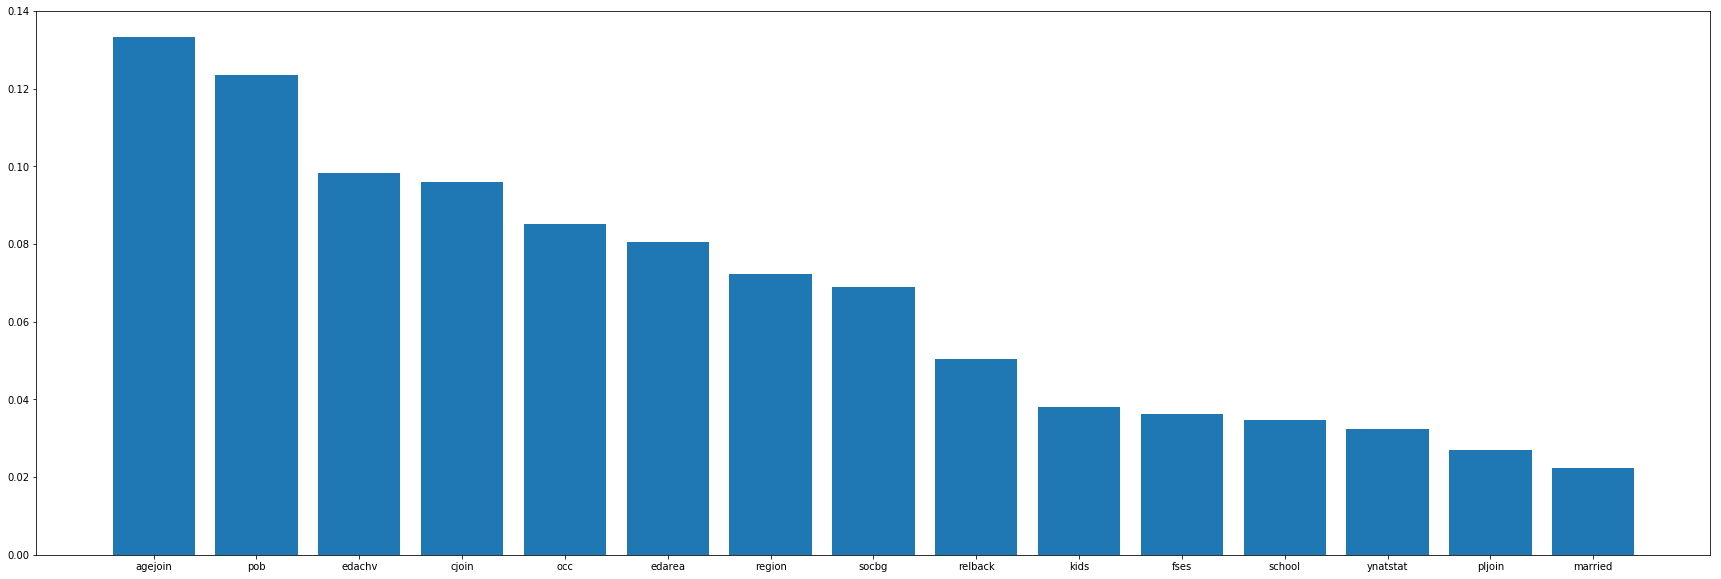

In [36]:
rfc = RandomForestClassifier(min_samples_split=2,n_estimators = 100,random_state = 42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f1_score(y_pred, y_test,average='weighted'))

# 使用pd.Series进行组合，值是特征重要性的值，index是样本特征，.sort_value 进行排序操作
feature_important = pd.Series(rfc.feature_importances_, index = feature_name).sort_values(ascending=False)
plt.figure(figsize=(30,10))
plt.bar(feature_important.index, feature_important.data)

plt.savefig('result.png')
plt.show()

Angola 安哥拉
Afghanistan 阿富汗
Albania 阿尔巴尼亚
Algeria 阿尔及利亚
Andorra 安道尔共和国
Anguilla 安圭拉岛
Antigua and Barbuda 安提瓜和巴布达
Argentina 阿根廷
Armenia 亚美尼亚
Ascension 阿森松
Australia 澳大利亚
Austria 奥地利
Azerbaijan 阿塞拜疆
Bahamas 巴哈马
Bahrain 巴林
Bangladesh 孟加拉国
Barbados 巴巴多斯
Belarus 白俄罗斯
Belgium 比利时
Belize 伯利兹
Benin 贝宁
Bermuda Is.百慕大群岛
Bolivia 玻利维亚
Botswana 博茨瓦纳
Brazil 巴西
Brunei 文莱
Bulgaria 保加利亚
Burkina-faso 布基纳法索
Burma 缅甸
Burundi 布隆迪
Cameroon 喀麦隆
Canada 加拿大
Cayman Is.开曼群岛
Central African Republic 中非共和国
Chad 乍得
Chile 智利
China 中国
Colombia 哥伦比亚
Congo 刚果
Cook Is.库克群岛
Costa Rica 哥斯达黎加
Cuba 古巴
Cyprus 塞浦路斯
Czech Republic 捷克
Denmark 丹麦
Djibouti 吉布提
Dominica Rep.多米尼加共和国
Ecuador 厄瓜多尔
Egypt 埃及
EI Salvador 萨尔瓦多
Estonia 爱沙尼亚
Ethiopia 埃塞俄比亚
Fiji 斐济
Finland 芬兰
France 法国
French Guiana 法属圭亚那
Gabon 加蓬
Gambia 冈比亚
Georgia 格鲁吉亚
Germany 德国
Ghana 加纳
Gibraltar 直布罗陀
Greece 希腊
Grenada 格林纳达
Guam 关岛
Guatemala 危地马拉
Guinea 几内亚
Guyana 圭亚那
Haiti 海地
Honduras 洪都拉斯
Hongkong 香港
Hungary 匈牙利
Iceland 冰岛
India 印度
Indonesia 印度尼西亚
Iran 伊朗
Iraq 伊拉克
Ireland 爱尔兰
Israel 以色列
Italy 意大利
Ivory Coast 科特迪瓦
Jamaica 牙买加
Japan 日本
Jordan 约旦
Kampuchea (Cambodia ) 柬埔寨
Kazakstan 哈萨克斯坦
Kenya 肯尼亚
Korea 韩国
Kuwait 科威特
Kyrgyzstan 吉尔吉斯坦
Laos 老挝
Latvia 拉脱维亚
Lebanon 黎巴嫩
Lesotho 莱索托
Liberia 利比里亚
Libya 利比亚
Liechtenstein 列支敦士登
Lithuania 立陶宛
Luxembourg 卢森堡
Macao 澳门
Madagascar 马达加斯加
Malawi 马拉维
Malaysia 马来西亚
Maldives 马尔代夫
Mali 马里
Malta 马耳他
Mariana Is 马里亚那群岛
Martinique 马提尼克
Mauritius 毛里求斯
Mexico 墨西哥
Moldova,Republic of 摩尔多瓦
Monaco 摩纳哥
Mongolia 蒙古
Montserrat Is 蒙特塞拉特岛
Morocco 摩洛哥
Mozambique 莫桑比克
Namibia 纳米比亚
Nauru 瑙鲁
Nepal 尼泊尔
Netheriands Antilles 荷属安的列斯
Netherlands 荷兰
New Zealand 新西兰
Nicaragua 尼加拉瓜
Niger 尼日尔
Nigeria 尼日利亚
North Korea 朝鲜
Norway 挪威
Oman 阿曼
Pakistan 巴基斯坦
Panama 巴拿马
Papua New Cuinea 巴布亚新几内亚
Paraguay 巴拉圭
Peru 秘鲁
Philippines 菲律宾
Poland 波兰
French Polynesia 法属玻利尼西亚
Portugal 葡萄牙
Puerto Rico 波多黎各
Qatar 卡塔尔
Reunion 留尼旺
Romania 罗马尼亚
Russia 俄罗斯
Saint Lueia 圣卢西亚
Saint Vincent 圣文森特岛
Samoa Eastern 东萨摩亚(美)
Samoa Western 西萨摩亚
San Marino 圣马力诺
Sao Tome and Principe 圣多美和普林西比
Saudi Arabia 沙特阿拉伯
Senegal 塞内加尔
Seychelles 塞舌尔
Sierra Leone 塞拉利昂
Singapore 新加坡
Slovakia 斯洛伐克
Slovenia 斯洛文尼亚
Solomon Is 所罗门群岛
Somali 索马里
South Africa 南非
Spain 西班牙
Sri Lanka 斯里兰卡
St.Lucia 圣卢西亚
St.Vincent 圣文森特
Sudan 苏丹
Suriname 苏里南
Swaziland 斯威士兰
Sweden 瑞典
Switzerland 瑞士
Syria 叙利亚
Taiwan 台湾省
Tajikstan 塔吉克斯坦
Tanzania 坦桑尼亚
Thailand 泰国
Togo 多哥
Tonga 汤加
Trinidad and Tobago 特立尼达和多巴哥
Tunisia 突尼斯
Turkey 土耳其
Turkmenistan 土库曼斯坦
Uganda 乌干达
Ukraine 乌克兰
United Arab Emirates 阿拉伯联合酋长国
United Kiongdom 英国
United States of America 美国
Uruguay 乌拉圭
Uzbekistan 乌兹别克斯坦
Venezuela 委内瑞拉
Vietnam 越南
Yemen 也门
Yugoslavia 南斯拉夫
Zimbabwe 津巴布韦
Zaire 扎伊尔
Zambia 赞比亚